# Split 7:3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Load data from CSV file
df = pd.read_csv('../../Data/fpt_data_sheet.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,19270,2019-03-01
1,19440,2019-03-04
2,19390,2019-03-05
3,19270,2019-03-06
4,19330,2019-03-07
...,...,...
1248,108000,2024-02-26
1249,107900,2024-02-27
1250,108500,2024-02-28
1251,109000,2024-02-29


In [3]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [6]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[101958.24191306 102030.30042424 102102.35893542 102174.4174466
 102246.47595777 102318.53446895 102390.59298013 102462.65149131
 102534.71000249 102606.76851367 102678.82702485 102750.88553603
 102822.94404721 102895.00255839 102967.06106957 103039.11958074
 103111.17809192 103183.2366031  103255.29511428 103327.35362546
 103399.41213664 103471.47064782 103543.529159   103615.58767018
 103687.64618136 103759.70469253 103831.76320371 103903.82171489
 103975.88022607 104047.93873725]


In [7]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 12414.36911043492
Testing MAE: 10786.420629773182
Testing MSLE: 0.026624498628713238
Testing MAPE: 15.275274749206247


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Testing RMSE: 12414.36911043492
Testing MAE: 10786.420629773182
Testing MSLE: 0.026624498628713238
Testing MAPE: 15.275274749206247


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


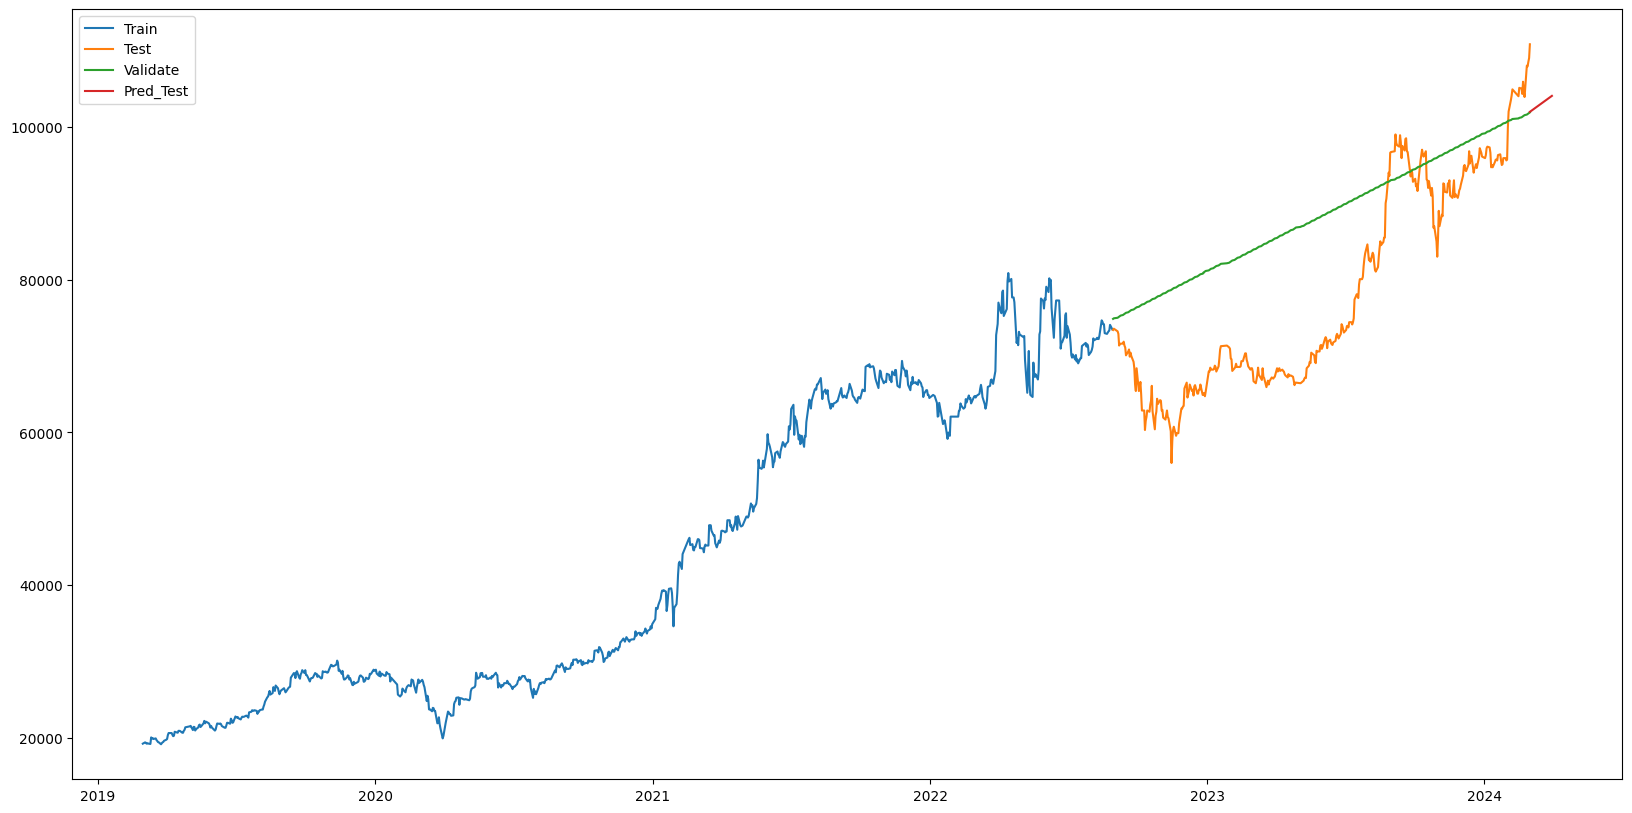

In [8]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=877, stop=1253, step=1)

# Split 8:2

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [11]:
# Load data from CSV file
df = pd.read_csv('../../Data/fpt_data_sheet.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,19270,2019-03-01
1,19440,2019-03-04
2,19390,2019-03-05
3,19270,2019-03-06
4,19330,2019-03-07
...,...,...
1248,108000,2024-02-26
1249,107900,2024-02-27
1250,108500,2024-02-28
1251,109000,2024-02-29


In [12]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [13]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [14]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [15]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[93865.08991854 93928.54482281 93991.99972709 94055.45463137
 94118.90953564 94182.36443992 94245.81934419 94309.27424847
 94372.72915274 94436.18405702 94499.6389613  94563.09386557
 94626.54876985 94690.00367412 94753.4585784  94816.91348267
 94880.36838695 94943.82329123 95007.2781955  95070.73309978
 95134.18800405 95197.64290833 95261.0978126  95324.55271688
 95388.00762116 95451.46252543 95514.91742971 95578.37233398
 95641.82723826 95705.28214253]


In [16]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 8708.759564508933
Testing MAE: 7623.528163941212
Testing MSLE: 0.011801923502755397
Testing MAPE: 9.645008175114759


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Testing RMSE: 8708.759564508933
Testing MAE: 7623.528163941212
Testing MSLE: 0.011801923502755397
Testing MAPE: 9.645008175114759


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


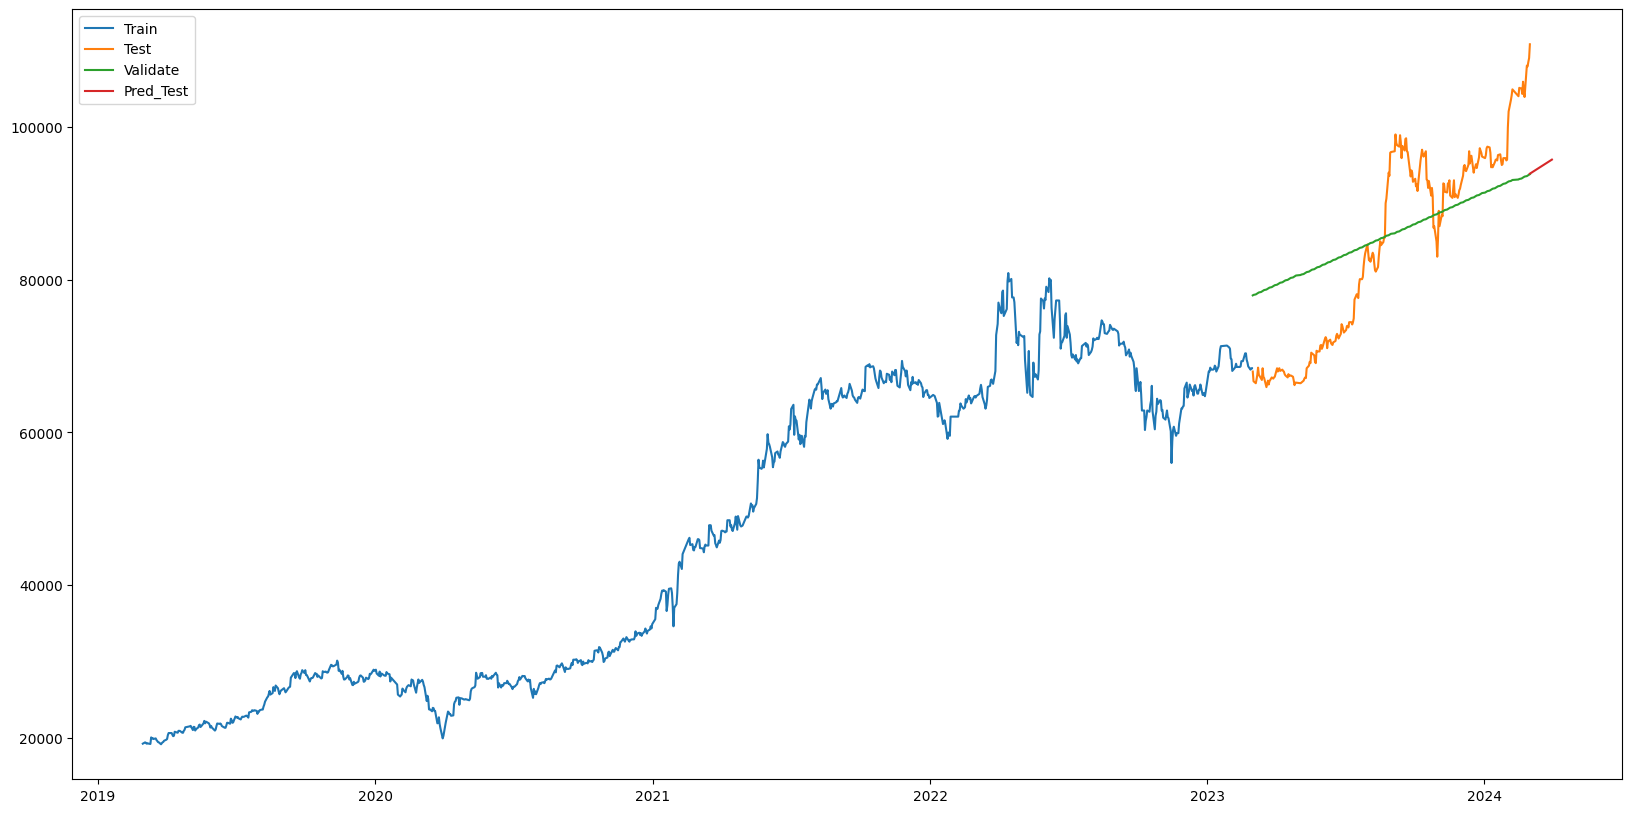

In [17]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [18]:
test_data.index

RangeIndex(start=1002, stop=1253, step=1)

# Split 9:1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
# Load data from CSV file
df = pd.read_csv('../../Data/fpt_data_sheet.csv')
# Convert Close time column to date format
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%d")
# Sort data by Close time column
df = df.sort_values("time")
df = df[['close','time']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,close,time
0,19270,2019-03-01
1,19440,2019-03-04
2,19390,2019-03-05
3,19270,2019-03-06
4,19330,2019-03-07
...,...,...
1248,108000,2024-02-26
1249,107900,2024-02-27
1250,108500,2024-02-28
1251,109000,2024-02-29


In [21]:
# 2. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [22]:
from pandas.core.indexers.utils import Any
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train=model.predict(x_train)


In [23]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

In [24]:
# 6. Tạo tập 30 ngày tiếp theo
df['time'] = pd.to_datetime(df['time'])
last_index = df['time'].index[-1]
last_date = df['time'].iloc[-1]
date_range = pd.date_range(last_date, periods=31, freq='D')

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[89743.19269537 89802.10659165 89861.02048794 89919.93438422
 89978.84828051 90037.76217679 90096.67607308 90155.58996936
 90214.50386564 90273.41776193 90332.33165821 90391.2455545
 90450.15945078 90509.07334707 90567.98724335 90626.90113964
 90685.81503592 90744.7289322  90803.64282849 90862.55672477
 90921.47062106 90980.38451734 91039.29841363 91098.21230991
 91157.1262062  91216.04010248 91274.95399876 91333.86789505
 91392.78179133 91451.69568762]


In [25]:
from sklearn.metrics import mean_squared_log_error
def calculate_mape(actual, predicted):
    ape = np.abs((actual - predicted) / actual)
    mape = np.mean(ape) * 100
    return mape

#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)


Testing RMSE: 10514.156055951951
Testing MAE: 9640.749866372706
Testing MSLE: 0.012981097274433213
Testing MAPE: 9.910992524812471


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Testing RMSE: 10514.156055951951
Testing MAE: 9640.749866372706
Testing MSLE: 0.012981097274433213
Testing MAPE: 9.910992524812471


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


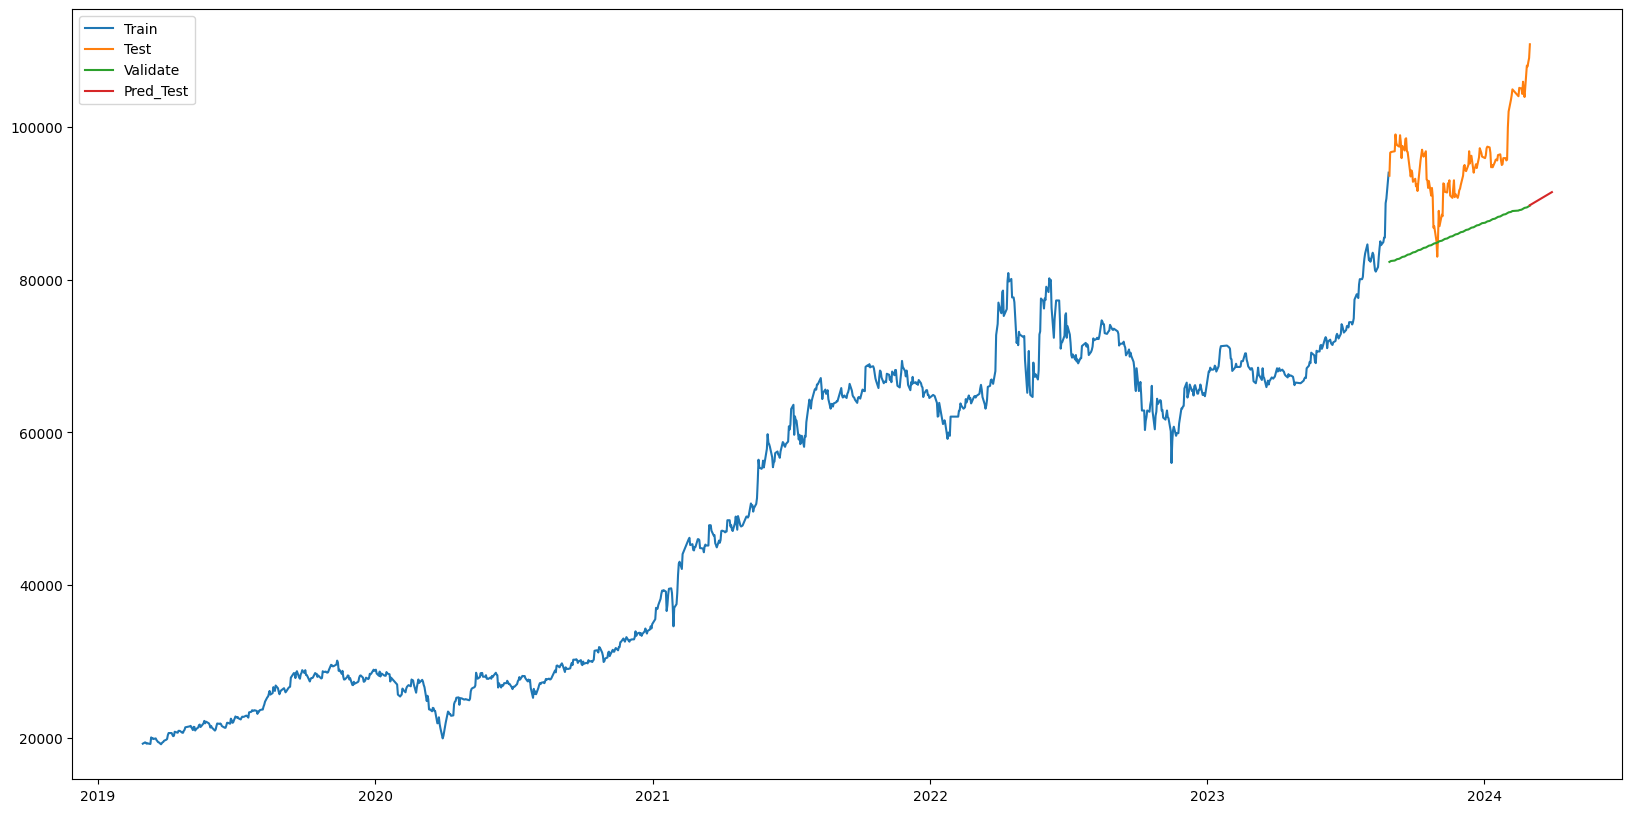

In [26]:
#RMSE
test_rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(y_pred, y_test)
print('Testing MAE:', test_mae)

#MSLE
testing_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', testing_msle)

# MAPE
test_mape = calculate_mape(y_test, y_pred)
print('Testing MAPE:', test_mape)

date_range = date_range[:-1]  # Cắt bớt phần tử cuối cùng của date_range

plt.subplots(figsize=(20,10))
plt.plot(train_data['time'], train_data['close'])
plt.plot(test_data['time'], test_data['close'])
plt.plot(test_data['time'], y_pred)
plt.plot(date_range, y_next_30_days)
plt.legend(['Train', 'Test', 'Validate', 'Pred_Test', 'Next30Day'])
plt.show()

In [27]:
test_data.index

RangeIndex(start=1127, stop=1253, step=1)